<a href="https://colab.research.google.com/github/Alzaro207/Ciudades-de-sc-de-tenerife/blob/main/IA_221B0184_Problema_del_Vendedor_Ambulante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema del Viajante

https://es.wikipedia.org/wiki/Problema_del_viajante


Dada una lista de ciudades y las distancias entre ellas, las capitales de todas las provincias españolas, por ejemplo, ¿cual es la ruta mas corta que visita cada ciudad y regresa a la ciudad original?

Cuaderno adaptado de:

https://colab.research.google.com/drive/1bJxMM3YhMRgLqS-0e2EQBZiUmi0p_7py?usp=sharing

Por Alumno. Alzaro Alvarez Perez.


Universidad Europea, 2023

# Intercambio par a par
El intercambio par a par o técnica 2-opt involucra en cada iteración la eliminación de dos aristas y el reemplazo de estas con dos aristas diferentes que reconecten los fragmentos creados por la eliminación de las aristas produciendo un camino nuevo más corto. Esto es un caso especial del método k-opt.

Note que la etiqueta Lin–Kernighan es un nombre erróneo para el 2-opt muchas veces utilizado. Lin–Kernighan es realmente el método más general de k-opt (https://en.wikipedia.org/wiki/2-opt).

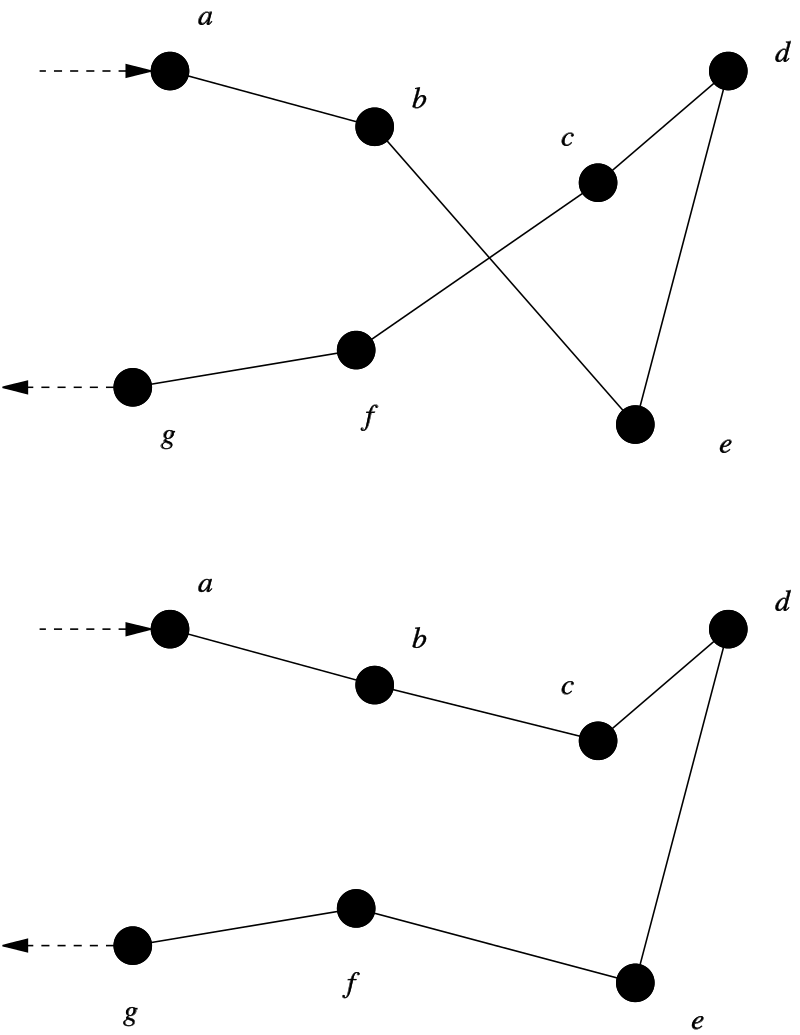

In [1]:
import numpy as np
import pandas as pd
from math import radians, cos, sin
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Calculamos la distancia euclidiana en espacio de la ruta r por la ciudad c,
# terminando al inicio:
distancia_ruta = lambda r, c: np.sum([np.linalg.norm(c[r[p]]-c[r[p-1]])
                                    for p in range(len(r))])

# Invertir el orden de los elementos desde i a k en r:
inversion = lambda r, i, k: np.concatenate((r[0:i],
                                            r[k:-len(r)+i-1:-1],
                                            r[k+1:len(r)]))

def two_opt(ciudades, umbral_mejora):
    # Vector de filas con las ciudades:
    ruta = np.arange(ciudades.shape[0])
    # Inicializar el factor de mejora:
    f_mejora = 1
    # Calcular la distancia de la primera ruta:
    mejor_dist = distancia_ruta(ruta, ciudades)

    # Si la ruta mejora seguimos optimizando:
    while f_mejora > umbral_mejora:
        # Guardamos la mejor distancia obtenida:
        dist_a_mejorar = mejor_dist

        # Para cada ciudad, excluyendo la primera y la ultima:
        for cambiar_primera in range(1, len(ruta)-2):
            # Para cada ciudad subsiguiente:
            print(f"i: {cambiar_primera}")
            for cambiar_ultima in range(cambiar_primera + 1, len(ruta)):
                print(f"j: {cambiar_primera}")
                # Invertimos el orden de las ciudades:
                nueva_ruta = inversion(ruta, cambiar_primera, cambiar_ultima)
                # Comprobamos la distancia con este cambio:
                nueva_distancia = distancia_ruta(nueva_ruta, ciudades)

                # Si ha mejorado la distancia:
                if nueva_distancia < mejor_dist:
                    # Esta es nuestra nueva mejor ruta:
                    ruta = nueva_ruta
                    # Esta es nuestra mejor distancia:
                    mejor_dist = nueva_distancia
        # Calculamos cuanto ha mejorado la ruta:
        f_mejora = 1 - mejor_dist/dist_a_mejorar
        # Si la ruta no mejora de manera sustancial, devolvemos la ruta:
    return ruta

# **Importar csv con Longitud y Latitud de las ciudades**

Importamos un archivo csv con longitud y latitud de ciudades, en este caso ciudades de Sc de Tenerife extraidas de https://www.coordenadas.com.es/espana/pueblos-de-santa-cruz-de-tenerife/38/1

In [4]:
!wget https://raw.githubusercontent.com/Alzaro207/Ciudades-de-sc-de-tenerife/main/CIUDADES_SC_TENERIFE.csv

--2023-11-10 20:39:15--  https://raw.githubusercontent.com/Alzaro207/Ciudades-de-sc-de-tenerife/main/CIUDADES_SC_TENERIFE.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2630 (2.6K) [text/plain]
Saving to: ‘CIUDADES_SC_TENERIFE.csv’

CIUDADES_SC_TENERIF 100%[===================>]   2.57K  --.-KB/s    in 0s      

2023-11-10 20:39:16 (30.7 MB/s) - ‘CIUDADES_SC_TENERIFE.csv’ saved [2630/2630]



In [5]:
ciudades = pd.read_csv("/content/CIUDADES_SC_TENERIFE.csv", header=None, sep= ',')
ciudades.head(10)

,0,1
0,- Adeje,"28.1263290229941,-16.743322671"
1,- Agulo,"28.1728870622202,-17.222670053"
2,- Alajero,"28.04992464544,-17.24586118513"
3,- Arafo,"28.3462946286713,-16.398885422"
4,- Arico,"28.166310725673,-16.4819422965"
5,- Arona,"28.0376628678951,-16.690448390"
6,- Barlovento,"28.8164179953269,-17.810256569"
7,- Brena-Alta,"28.6521575393028,-17.803255815"
8,- Brena-Baja,"28.6337953942449,-17.779932714"
9,- Buenavista-del-Norte,"28.3423567386905,-16.872179353"


In [6]:
ciudades[1].str.split(',')

0     [28.1263290229941, -16.743322671]
1     [28.1728870622202, -17.222670053]
2     [28.04992464544, -17.24586118513]
3     [28.3462946286713, -16.398885422]
4     [28.166310725673, -16.4819422965]
5     [28.0376628678951, -16.690448390]
6     [28.8164179953269, -17.810256569]
7     [28.6521575393028, -17.803255815]
8     [28.6337953942449, -17.779932714]
9     [28.3423567386905, -16.872179353]
10    [28.3580804143401, -16.384250829]
11    [28.2319128319775, -16.442110781]
12    [27.7297537425455, -18.053204479]
13    [28.493292890414, -17.8501284147]
14    [28.3605137954095, -16.761169601]
15    [28.8152127109541, -17.918576240]
16    [28.1021119041367, -16.557653980]
17    [28.3788883116852, -16.660351896]
18    [28.1906925072344, -16.796501086]
19              [28.463938, -16.262598]
20    [28.1500857610502, -17.184493956]
21    [28.3670380188941, -16.699920531]
22    [28.614636592454, -17.9008444506]
23    [28.4451204205056, -16.449739984]
24    [28.3193246446715, -16.547616464]


In [7]:
ciudades[['Lat', 'Lon']] = ciudades[1].str.split(',', 1, expand=True)

<ipython-input-7-fcb0deee1ebb>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  ciudades[['Lat', 'Lon']] = ciudades[1].str.split(',', 1, expand=True)


In [8]:
ciudades.tail()

,0,1,Lat,Lon
48,- Vallehermoso,"28.1537480474806,-17.285581459",28.1537480474806,-17.285581459
49,- Valverde,"27.7985655681641,-17.934825641",27.7985655681641,-17.934825641
50,- Victoria-de-Acentejo-La,"28.4228763271763,-16.455718925",28.4228763271763,-16.455718925
51,- Vilaflor,"28.155989148242,-16.6400187269",28.155989148242,-16.6400187269
52,- Villa-de-Mazo,"28.5884984532099,-17.776867426",28.5884984532099,-17.776867426


In [9]:
ciudades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       53 non-null     object
 1   1       53 non-null     object
 2   Lat     53 non-null     object
 3   Lon     53 non-null     object
dtypes: object(4)
memory usage: 1.8+ KB


In [10]:
# Por defecto, el tipo de datos en el dataframe es "object".
# Pasando los datos a tipo "numeric" mejoramos la manera de trabajar con ellos.
ciudades['Lon'] = ciudades['Lon'].apply(pd.to_numeric)
ciudades['Lat'] = ciudades['Lat'].apply(pd.to_numeric)

In [11]:
ciudades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       53 non-null     object 
 1   1       53 non-null     object 
 2   Lat     53 non-null     float64
 3   Lon     53 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.8+ KB


# **Convertidor de Latitud y Longitud a Coordenadas Cartesianas**

** R de la tierra =6371 KM**


 x = R * cos( radiance(lat) ) * cos(radiance (lon))


 y = R * cos( radiance(lat) ) * sin(radiance (lon))


 http://www.geomidpoint.com/example.html





In [12]:
R = 6371
lat = ciudades["Lat"].map(radians)
lon = ciudades["Lon"].map(radians)
x = lon.map(cos) * lat.map(cos) * R
y = lon.map(cos) * lat.map(sin) * R

ciudades["lat_rads"] = lat
ciudades["lon_rads"] = lon
ciudades["x"] = x
ciudades["y"] = y
ciudades.head()

,0,1,Lat,Lon,lat_rads,lon_rads,x,y
0,- Adeje,"28.1263290229941,-16.743322671",28.126329,-16.743323,0.490897,-0.292226,5380.447683,2876.069665
1,- Agulo,"28.1728870622202,-17.222670053",28.172887,-17.222670,0.491710,-0.300592,5364.384758,2873.090392
2,- Alajero,"28.04992464544,-17.24586118513",28.049925,-17.245861,0.489564,-0.300997,5369.864055,2861.212007
3,- Arafo,"28.3462946286713,-16.398885422",28.346295,-16.398885,0.494736,-0.286215,5378.979951,2901.890976
4,- Arico,"28.166310725673,-16.4819422965",28.166311,-16.481942,0.491595,-0.287664,5385.764852,2883.745828


In [13]:
ciudades_d = ciudades.drop([1, "Lon","Lat", "lat_rads", "lon_rads"], 1)
ciudades_d.head()

<ipython-input-13-0b41019deb5b>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ciudades_d = ciudades.drop([1, "Lon","Lat", "lat_rads", "lon_rads"], 1)


,0,x,y
0,- Adeje,5380.447683,2876.069665
1,- Agulo,5364.384758,2873.090392
2,- Alajero,5369.864055,2861.212007
3,- Arafo,5378.979951,2901.890976
4,- Arico,5385.764852,2883.745828


In [14]:
ciudades_d.set_index(0, inplace=True)

In [15]:
ciudades_d.head()

,x,y
0,,
- Adeje,5380.447683,2876.069665
- Agulo,5364.384758,2873.090392
- Alajero,5369.864055,2861.212007
- Arafo,5378.979951,2901.890976
- Arico,5385.764852,2883.745828


In [16]:
df = ciudades_d.copy()

In [17]:
scaler = MinMaxScaler(feature_range=(0, 100), copy=True)
df_escalado = scaler.fit_transform(df)
df_escalado = pd.DataFrame(df_escalado, columns=['x1', 'x2'])

In [18]:
df_escalado

,x1,x2
0,91.480083,54.735887
1,70.207329,51.903470
2,77.463774,40.610604
3,89.536309,79.284393
4,98.521816,62.033670
5,99.342679,47.572459
6,4.205918,100.000000
7,15.554060,85.611950
8,17.709255,84.350970
9,72.239235,72.132878


In [19]:
%load_ext google.colab.data_table
df_escalado

,x1,x2
0,91.480083,54.735887
1,70.207329,51.903470
2,77.463774,40.610604
3,89.536309,79.284393
4,98.521816,62.033670
5,99.342679,47.572459
6,4.205918,100.000000
7,15.554060,85.611950
8,17.709255,84.350970
9,72.239235,72.132878


In [20]:
ciudades_d = np.asarray(ciudades_d)

In [21]:
escalado = np.asarray(df_escalado)
escalado

array([[ 91.48008259,  54.73588669],
       [ 70.20732936,  51.90346981],
       [ 77.46377359,  40.61060394],
       [ 89.53630922,  79.28439258],
       [ 98.52181635,  62.03367003],
       [ 99.34267899,  47.57245853],
       [  4.20591766, 100.        ],
       [ 15.55405962,  85.61195027],
       [ 17.70925478,  84.35096983],
       [ 72.23923521,  72.1328785 ],
       [ 89.28081649,  80.54362382],
       [ 95.60887963,  68.4589107 ],
       [ 66.62055787,   0.        ],
       [ 24.35000394,  70.84574335],
       [ 75.18594862,  75.36213085],
       [  0.        ,  98.20062121],
       [100.        ,  55.22274447],
       [ 77.71078527,  78.45525392],
       [ 85.20538925,  59.71412305],
       [ 86.59147531,  91.70940695],
       [ 73.18704375,  50.43682495],
       [ 77.03359788,  76.82883439],
       [ 14.20757097,  80.78264218],
       [ 81.03520065,  87.37677606],
       [ 85.87710932,  74.76187598],
       [ 12.51544363,  85.17012639],
       [ 79.81624624,  82.90817127],
 

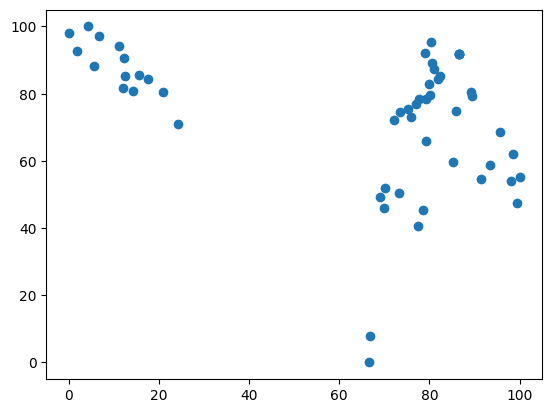

In [22]:
# Mostramos las Ciudades.
plt.scatter(escalado[:, 0], escalado[:, 1]);


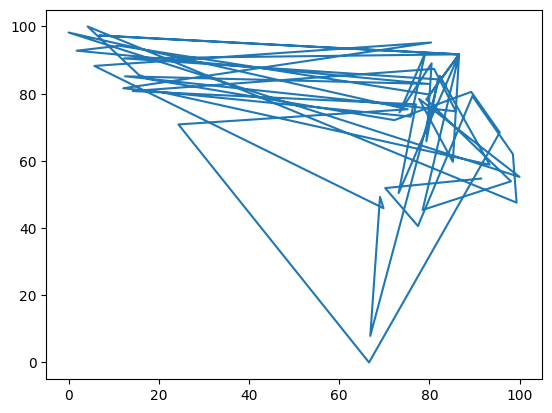

In [23]:
# Mostramos la ruta inicial, estan organizadas en orden alfabetico.
plt.plot(escalado[:, 0], escalado[:, 1])
plt.show()

# Busqueda de Rutas

In [24]:
#  Encontramos una buena ruta (la ruta da el orden de viaje por numero de fila)
ruta = two_opt(escalado, 0.001)
ruta

Se han truncado las últimas 5000 líneas del flujo de salida.
j: 11
j: 11
j: 11
j: 11
j: 11
j: 11
j: 11
j: 11
j: 11
j: 11
j: 11
j: 11
j: 11
j: 11
j: 11
j: 11
j: 11
i: 12
j: 12
j: 12
j: 12
j: 12
j: 12
j: 12
j: 12
j: 12
j: 12
j: 12
j: 12
j: 12
j: 12
j: 12
j: 12
j: 12
j: 12
j: 12
j: 12
j: 12
j: 12
j: 12
j: 12
j: 12
j: 12
j: 12
j: 12
j: 12
j: 12
j: 12
j: 12
j: 12
j: 12
j: 12
j: 12
j: 12
j: 12
j: 12
j: 12
j: 12
i: 13
j: 13
j: 13
j: 13
j: 13
j: 13
j: 13
j: 13
j: 13
j: 13
j: 13
j: 13
j: 13
j: 13
j: 13
j: 13
j: 13
j: 13
j: 13
j: 13
j: 13
j: 13
j: 13
j: 13
j: 13
j: 13
j: 13
j: 13
j: 13
j: 13
j: 13
j: 13
j: 13
j: 13
j: 13
j: 13
j: 13
j: 13
j: 13
j: 13
i: 14
j: 14
j: 14
j: 14
j: 14
j: 14
j: 14
j: 14
j: 14
j: 14
j: 14
j: 14
j: 14
j: 14
j: 14
j: 14
j: 14
j: 14
j: 14
j: 14
j: 14
j: 14
j: 14
j: 14
j: 14
j: 14
j: 14
j: 14
j: 14
j: 14
j: 14
j: 14
j: 14
j: 14
j: 14
j: 14
j: 14
j: 14
j: 14
i: 15
j: 15
j: 15
j: 15
j: 15
j: 15
j: 15
j: 15
j: 15
j: 15
j: 15
j: 15
j: 15
j: 15
j: 15
j: 15
j: 15
j: 15
j: 15
j: 

array([ 0, 51, 34,  5, 16,  4, 11, 24,  3, 10, 19, 36, 32, 30, 45, 42, 40,
       23, 50, 38, 26, 29, 33, 17, 21, 14, 43, 41,  9, 52,  8,  7, 37, 28,
       31,  6, 15, 27, 46, 25, 44, 22, 13, 12, 49,  2, 35, 47, 48,  1, 20,
       39, 18])

In [25]:
# Diagrama Cartesiano
# Reordenamos la matriz por ruta:
nuevo_orden = np.concatenate((np.array([escalado[ruta[i]]
                                        for i in range(len(ruta))]),
                              np.array([escalado[0]])))

In [26]:
nuevo_orden

array([[ 91.48008259,  54.73588669],
       [ 93.35970573,  58.86360498],
       [ 98.09936284,  53.9209899 ],
       [ 99.34267899,  47.57245853],
       [100.        ,  55.22274447],
       [ 98.52181635,  62.03367003],
       [ 95.60887963,  68.4589107 ],
       [ 85.87710932,  74.76187598],
       [ 89.53630922,  79.28439258],
       [ 89.28081649,  80.54362382],
       [ 86.59147531,  91.70940695],
       [ 86.59147531,  91.70940695],
       [ 86.59147531,  91.70940695],
       [ 86.59147531,  91.70940695],
       [ 80.39114626,  95.23170355],
       [ 79.10320307,  92.24440271],
       [ 80.49904423,  89.0362981 ],
       [ 81.03520065,  87.37677606],
       [ 82.31174486,  85.30837292],
       [ 81.86714692,  84.26191996],
       [ 79.81624624,  82.90817127],
       [ 80.07280182,  79.72726832],
       [ 79.32758906,  78.29492039],
       [ 77.71078527,  78.45525392],
       [ 77.03359788,  76.82883439],
       [ 75.18594862,  75.36213085],
       [ 75.8917368 ,  73.17921906],
 

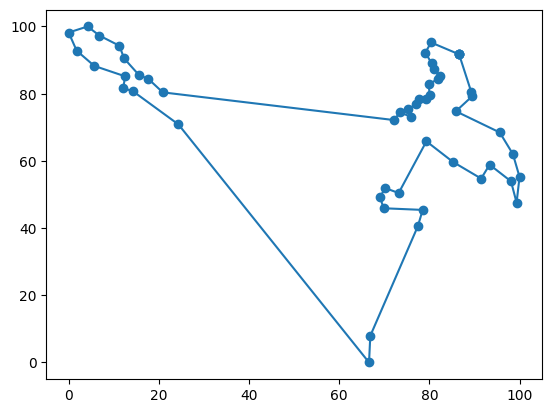

Ruta: [ 0 51 34  5 16  4 11 24  3 10 19 36 32 30 45 42 40 23 50 38 26 29 33 17
 21 14 43 41  9 52  8  7 37 28 31  6 15 27 46 25 44 22 13 12 49  2 35 47
 48  1 20 39 18]

Distancia Escalada: 412.9495299777395


In [27]:
# Mostramos las Ciudades.
plt.scatter(escalado[:,0], escalado[:,1])
# Mostramos la Ruta.
plt.plot(nuevo_orden[:,0], nuevo_orden[:,1])
plt.show()
# Imprimimos la ruta y la distancia:
print("Ruta: " + str(ruta) + "\n\nDistancia Escalada: "
      + str(distancia_ruta(ruta, escalado)))

In [28]:
orden = pd.DataFrame(ruta, columns=["index"])
ciudades["index"] = ciudades.index
viaje = orden.merge(ciudades, on = "index")
viaje

,index,0,1,Lat,Lon,lat_rads,lon_rads,x,y
0,0,- Adeje,"28.1263290229941,-16.743322671",28.126329,-16.743323,0.490897,-0.292226,5380.447683,2876.069665
1,51,- Vilaflor,"28.155989148242,-16.6400187269",28.155989,-16.640019,0.491415,-0.290423,5381.866974,2880.411400
2,34,- San-Miguel-de-Abona,"28.0971208203361,-16.617851257",28.097121,-16.617851,0.490387,-0.290036,5385.445860,2875.212517
3,5,- Arona,"28.0376628678951,-16.690448390",28.037663,-16.690448,0.489350,-0.291303,5386.384680,2868.534824
4,16,- Granadilla-de-Abona,"28.1021119041367,-16.557653980",28.102112,-16.557654,0.490474,-0.288986,5386.881019,2876.581766
5,4,- Arico,"28.166310725673,-16.4819422965",28.166311,-16.481942,0.491595,-0.287664,5385.764852,2883.745828
6,11,- Fasnia,"28.2319128319775,-16.442110781",28.231913,-16.442111,0.492740,-0.286969,5383.565312,2890.504208
7,24,- Orotava-La,"28.3193246446715,-16.547616464",28.319325,-16.547616,0.494265,-0.288810,5376.216912,2897.133973
8,3,- Arafo,"28.3462946286713,-16.398885422",28.346295,-16.398885,0.494736,-0.286215,5378.979951,2901.890976
9,10,- Candelaria,"28.3580804143401,-16.384250829",28.358080,-16.384251,0.494942,-0.285959,5378.787030,2903.215496


In [29]:
inicio = viaje[0:1]
ciclo = viaje.append(inicio)
ciclo

<ipython-input-29-13178ab9a8cd>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ciclo = viaje.append(inicio)


,index,0,1,Lat,Lon,lat_rads,lon_rads,x,y
0,0,- Adeje,"28.1263290229941,-16.743322671",28.126329,-16.743323,0.490897,-0.292226,5380.447683,2876.069665
1,51,- Vilaflor,"28.155989148242,-16.6400187269",28.155989,-16.640019,0.491415,-0.290423,5381.866974,2880.411400
2,34,- San-Miguel-de-Abona,"28.0971208203361,-16.617851257",28.097121,-16.617851,0.490387,-0.290036,5385.445860,2875.212517
3,5,- Arona,"28.0376628678951,-16.690448390",28.037663,-16.690448,0.489350,-0.291303,5386.384680,2868.534824
4,16,- Granadilla-de-Abona,"28.1021119041367,-16.557653980",28.102112,-16.557654,0.490474,-0.288986,5386.881019,2876.581766
5,4,- Arico,"28.166310725673,-16.4819422965",28.166311,-16.481942,0.491595,-0.287664,5385.764852,2883.745828
6,11,- Fasnia,"28.2319128319775,-16.442110781",28.231913,-16.442111,0.492740,-0.286969,5383.565312,2890.504208
7,24,- Orotava-La,"28.3193246446715,-16.547616464",28.319325,-16.547616,0.494265,-0.288810,5376.216912,2897.133973
8,3,- Arafo,"28.3462946286713,-16.398885422",28.346295,-16.398885,0.494736,-0.286215,5378.979951,2901.890976
9,10,- Candelaria,"28.3580804143401,-16.384250829",28.358080,-16.384251,0.494942,-0.285959,5378.787030,2903.215496


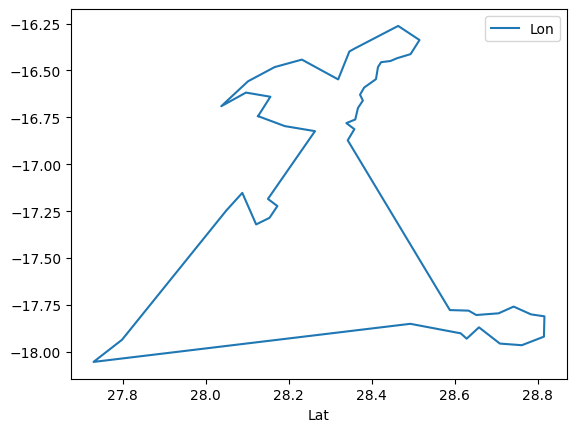

In [30]:
# Dibujar Latitud y Longitud
ciclo.plot(kind="line", x="Lat", y="Lon");

# Representacion de las Rutas

In [36]:
# Escribimos la ruta como puntos:
viajante = ciclo[["Lat", "Lon"]]

In [37]:
viajante

,Lat,Lon
0,28.126329,-16.743323
1,28.155989,-16.640019
2,28.097121,-16.617851
3,28.037663,-16.690448
4,28.102112,-16.557654
5,28.166311,-16.481942
6,28.231913,-16.442111
7,28.319325,-16.547616
8,28.346295,-16.398885
9,28.358080,-16.384251


In [38]:
viajante.iloc[0]

Lat    28.126329
Lon   -16.743323
Name: 0, dtype: float64

In [39]:
import folium

In [42]:
mapa = folium.Map(location=viajante.iloc[0], zoom_start=10.2)
puntos_totales = len(viajante)
for i in range(0, puntos_totales):
  x = viajante.iloc[i]['Lat']
  y = viajante.iloc[i]['Lon']
  punto = [x, y]
  ciudad = ciclo.iloc[i][0]

  if i == 0 or i == puntos_totales - 1:
    color = 'black'
  else:
    color = 'blue'

  icon = folium.Icon(color=color)
  # folium.Marker(punto, popup=ciudad, icon=icon).add_to(mapa)

  if i != 0:
    x_ant = viajante.iloc[i-1]['Lat']
    y_ant = viajante.iloc[i-1]['Lon']
    punto_anterior = [x_ant, y_ant]
    folium.PolyLine([punto, punto_anterior],
                  color='red',
                  weight=15,
                  opacity=0.8).add_to(mapa)


mapa